## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

merged_df= pd.merge(study_results, mouse_metadata,how="left", on="Mouse ID") 
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


regimen_df=merged_df.groupby(["Drug Regimen"])
means=regimen_df.mean()["Tumor Volume (mm3)"] 
medians=regimen_df.median()["Tumor Volume (mm3)"] 
variances=regimen_df.var()["Tumor Volume (mm3)"] 
standard_dev=regimen_df.std()["Tumor Volume (mm3)"] 
SEM=regimen_df.sem()["Tumor Volume (mm3)"] 

summary_df= pd.DataFrame({"means":means, "medians": medians, "variances":variances, "standard_dev":standard_dev, "SEM":SEM}) 
summary_df





,means,medians,variances,standard_dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

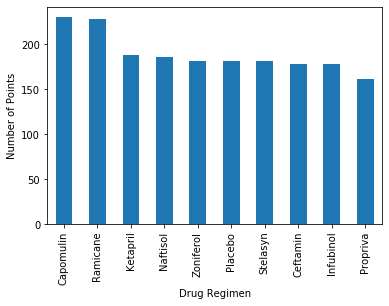

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas


counts=merged_df["Drug Regimen"].value_counts()  
counts.plot(kind="bar")
plt.xlabel("Drug Regimen") 
plt.ylabel("Number of Points")
plt.show() 


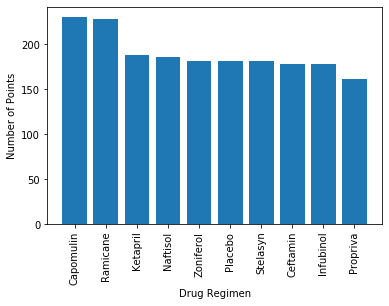

In [13]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot


counts=merged_df["Drug Regimen"].value_counts()  
plt.bar(counts.index.values,counts.values) 
plt.xlabel("Drug Regimen") 
plt.ylabel("Number of Points")
plt.xticks(rotation=90) 
plt.show() 


## Pie plots

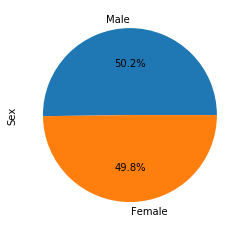

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

counts=mouse_metadata.Sex.value_counts() 
counts.plot(kind="pie",autopct="%1.1f%%")
plt.show() 




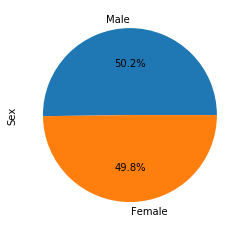

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counts=mouse_metadata.Sex.value_counts()
plt.pie(counts.values, labels=counts.index.values,autopct="%1.1f%%")
plt.ylabel("Sex") 
plt.show() 

## Quartiles, outliers and boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

max_tumor=merged_df.groupby(["Mouse ID"]).max().reset_index() 
merged_tumor_df=max_tumor[["Mouse ID", "Timepoint"]].merge(merged_df,on=["Mouse ID", "Timepoint"], how="left") 

Capomulin=merged_tumor_df.loc[merged_tumor_df["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"] 
Ceftamin=merged_tumor_df.loc[merged_tumor_df["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"] 
Infubinol=merged_tumor_df.loc[merged_tumor_df["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"] 
Ramicane=merged_tumor_df.loc[merged_tumor_df["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"] 




#Calculate the IQR and quantitatively determine if there are any potential outliers. 

i_quantiles=Infubinol.quantile([.25,.5,.75])
i_lowerq=i_quantiles[.25]
i_upperq=i_quantiles[.75]
i_iqr=i_upperq-i_lowerq
i_lowerbound= i_lowerq-(1.5*i_iqr) 
i_upperbound=i_upperq+(1.5*i_iqr) 

Infubinol.loc[(Infubinol<i_lowerbound)|(Infubinol>i_upperbound)] 




31    36.321346
Name: Tumor Volume (mm3), dtype: float64

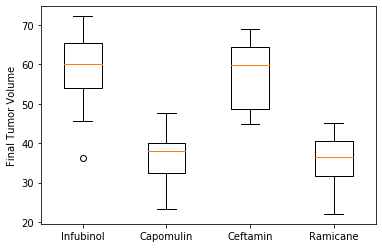

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot([Infubinol, Capomulin, Ceftamin, Ramicane], labels=["Infubinol", "Capomulin", "Ceftamin", "Ramicane"]) 
plt.ylabel("Final Tumor Volume") 
plt.show()




## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

PLT.PLOT

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

PLT.SCATTER

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

COMBO, PANDAS TO DO STD, R, LINEAR REG